In [1]:
# importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# importing the dataset 

from sklearn.datasets import load_diabetes
dataset=load_diabetes()

In [7]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [12]:
df=pd.DataFrame(data=dataset['data'], columns=['age',
  'sex',
  'bmi',
  'bp',
  's1',
  's2',
  's3',
  's4',
  's5',
  's6'])

In [13]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

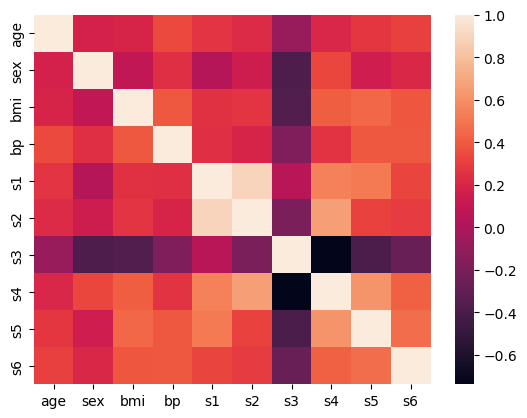

In [16]:
sns.heatmap(df.corr())

In [17]:
# Independent and Dependent Features

X=df
y=dataset['target']

In [18]:
# splitting our dataset into train and test splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=25)

In [19]:
# creating model and fitting data to the model

from sklearn.tree import DecisionTreeRegressor
treeregressor=DecisionTreeRegressor()
treeregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
# scoring our model

y_pred1=treeregressor.predict(X_test)
score=treeregressor.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
print("Error:",mean_squared_error(y_test, y_pred1))
print("Score:",score)


Error: 7139.61797752809
Score: -0.38081400785726904


In [26]:
# Hyperparameter Tuning our Model

params={
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['sqrt', 'log2']
}

from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(cv=5, param_grid=params, estimator=treeregressor, scoring='neg_mean_squared_error')

In [27]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [28]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [29]:
grid.best_score_

np.float64(-3996.3330427487017)

In [30]:
# creating our best model

bestmodel=DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_features='sqrt', splitter='best')
bestmodel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='sqrt')

In [31]:
y_pred=bestmodel.predict(X_test)

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error:{mse}\nMean Absolute Error:{mae}\nR2 Score:{r2}")

Mean Squared Error:4689.512989585177
Mean Absolute Error:54.43347313553909
R2 Score:0.09304037745031357


[Text(0.47767857142857145, 0.9166666666666666, 'x[3] <= 0.024\nfriedman_mse = 6121.287\nsamples = 353\nvalue = 152.048'),
 Text(0.23660714285714285, 0.75, 'x[7] <= -0.039\nfriedman_mse = 4337.011\nsamples = 241\nvalue = 127.867'),
 Text(0.35714285714285715, 0.8333333333333333, 'True  '),
 Text(0.11607142857142858, 0.5833333333333334, 'x[5] <= 0.023\nfriedman_mse = 2747.7\nsamples = 116\nvalue = 100.724'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[6] <= -0.008\nfriedman_mse = 2368.284\nsamples = 113\nvalue = 98.531'),
 Text(0.03571428571428571, 0.25, 'x[0] <= -0.055\nfriedman_mse = 1993.41\nsamples = 10\nvalue = 134.7'),
 Text(0.017857142857142856, 0.08333333333333333, 'friedman_mse = 654.25\nsamples = 4\nvalue = 103.5'),
 Text(0.05357142857142857, 0.08333333333333333, 'friedman_mse = 1804.583\nsamples = 6\nvalue = 155.5'),
 Text(0.10714285714285714, 0.25, 'x[2] <= 0.008\nfriedman_mse = 2265.339\nsamples = 103\nvalue = 95.019'),
 Text(0.08928571428571429, 0.08333333333333333, 'f

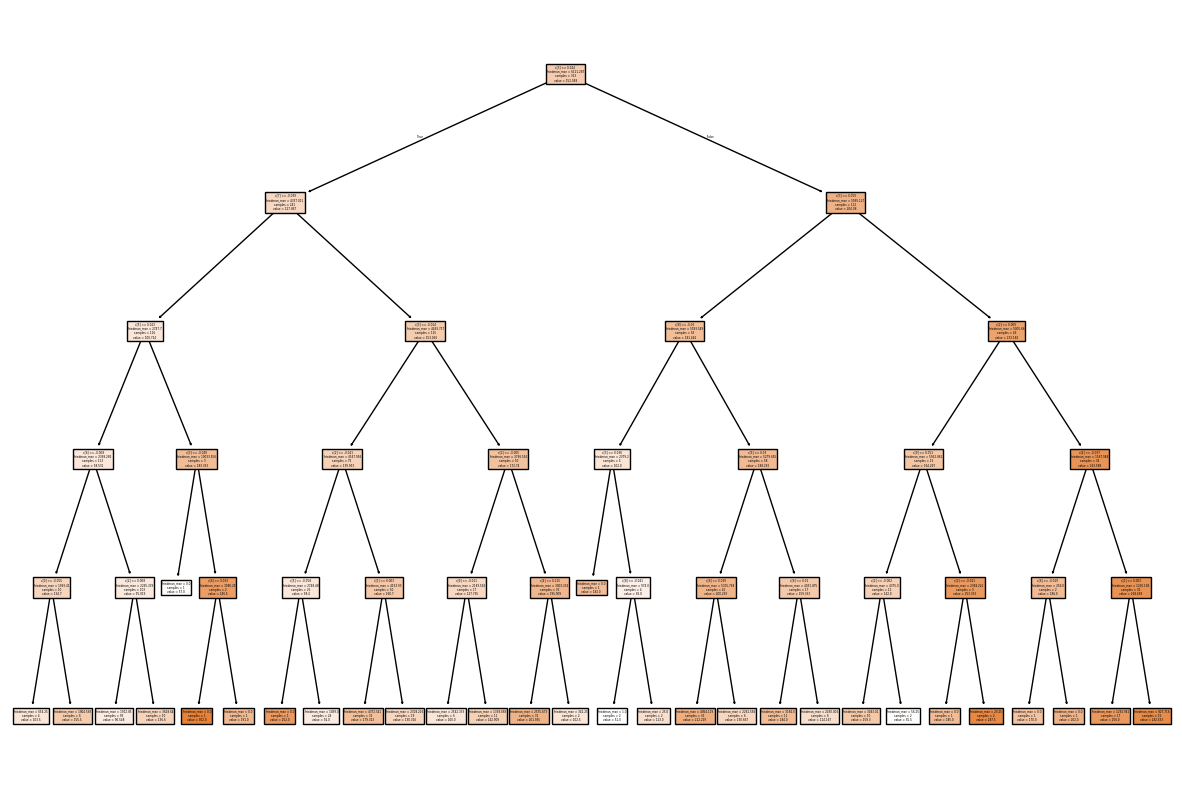

In [34]:
# visualizing our Decison Tree

plt.figure(figsize=(15,10))

from sklearn import tree
tree.plot_tree(decision_tree=bestmodel, filled=True)